In [3]:
! pip install tensorflow

^C


In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer #For text stemming(works with English, Russian, Danish, French, Finnish, German, Italian etc)
from sklearn.model_selection import train_test_split

import re

In [23]:
df= pd.read_csv("imdb_labelled.csv")
df

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [24]:
df.shape

(1000, 2)

In [25]:
#Check for missing data
df.isnull().sum()

text     0
label    0
dtype: int64

In [26]:
# Rename Columns 
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
#view result
df

,Text,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [27]:
# Rename the Labels also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Negative')
df['Label'] = df['Label'].replace(1,'Positive')

C:\Users\enkurunziza\AppData\Local\Temp\ipykernel_30504\1845043233.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")


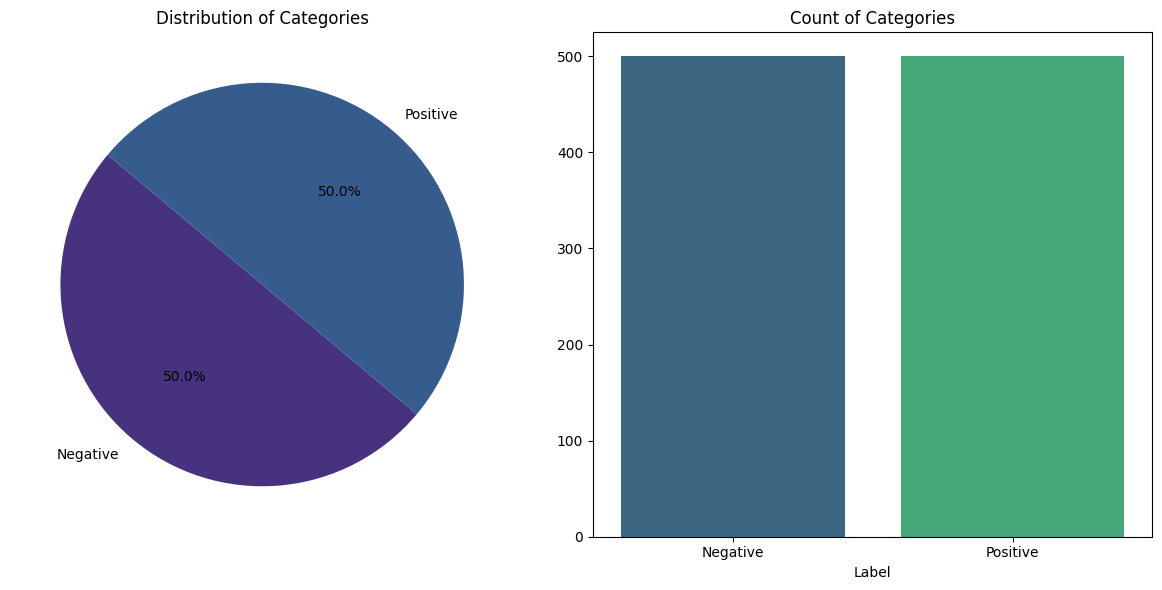

In [28]:
# Value Count Of Labels
count = df['Label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The positive and negative statements are the same.

In [37]:
df

,Text,Label
0,"A very, very, very slow-moving, aimless movie ...",Negative
1,Not sure who was more lost - the flat characte...,Negative
2,Attempting artiness with black & white and cle...,Negative
3,Very little music or anything to speak of.,Negative
4,The best scene in the movie was when Gerardo i...,Positive
...,...,...
995,I just got bored watching Jessice Lange take h...,Negative
996,"Unfortunately, any virtue in this film's produ...",Negative
997,"In a word, it is embarrassing.",Negative
998,Exceptionally bad!,Negative


**ii. Visualising using a word cloud**

In [38]:
# Make Seperate Data Set to Visualize text 
# Positive
#df_pos = df[df['Label']=='Positive']
# Negative
#df_neg = df[df['Label']=='Negative']

df_pos = df[df['Label'].str.lower() == 'positive']
df_neg = df[df['Label'].str.lower() == 'negative']


In [40]:
df_neg

,Text,Label
0,"A very, very, very slow-moving, aimless movie ...",Negative
1,Not sure who was more lost - the flat characte...,Negative
2,Attempting artiness with black & white and cle...,Negative
3,Very little music or anything to speak of.,Negative
5,"The rest of the movie lacks art, charm, meanin...",Negative
...,...,...
995,I just got bored watching Jessice Lange take h...,Negative
996,"Unfortunately, any virtue in this film's produ...",Negative
997,"In a word, it is embarrassing.",Negative
998,Exceptionally bad!,Negative


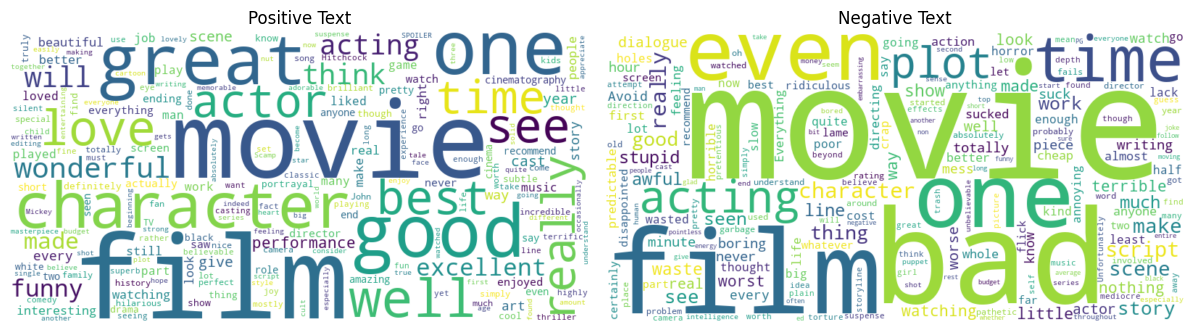

In [41]:
# Combine text from different categories
combined_pos_text = ' '.join(df_pos['Text'])
combined_neg_text = ' '.join(df_neg['Text'])

# Create word clouds
pos_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_pos_text)
neg_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_neg_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.title('Positive Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.title('Negative Text')
plt.axis('off')

plt.tight_layout()
plt.show()

**E. Text data pre-processing for ML**
1. **Step 1: Remove URLs:** Uses a regular expression to remove URLs from the text data.

2. **Step 2: Remove special characters and punctuation:** Uses a regular expression to remove any special characters and punctuation marks from the text.

3. **Step 3: Remove extra whitespaces:** Uses a regular expression to remove extra whitespaces and replace them with a single space.

4. **Step 4: Remove numeric values:** Uses a regular expression to remove any numeric values from the text.

5. **Step 6: Lowercasing:** Converts all text to lowercase to ensure consistency.

6. **Step 8: Remove stop words:** Removes common English stop words, such as "the," "is," "and," etc., using NLTK's stopwords list.

7. **Step 9: Remove non-alphanumeric characters:** Uses a regular expression to remove any non-alphanumeric characters from the text.

In [42]:
#Import libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enkurunziza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\enkurunziza\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

**i. Remove URLS**

In [43]:
#Remove URLs from the "Text" variable
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text     Label
0  A very, very, very slow-moving, aimless movie ...  Negative
1  Not sure who was more lost - the flat characte...  Negative
2  Attempting artiness with black & white and cle...  Negative
3       Very little music or anything to speak of.    Negative
4  The best scene in the movie was when Gerardo i...  Positive


**ii. Remove special characters and punctuation**

In [44]:
# Remove special characters and punctuation from the "Text" variable
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text     Label
0  A very very very slowmoving aimless movie abou...  Negative
1  Not sure who was more lost  the flat character...  Negative
2  Attempting artiness with black  white and clev...  Negative
3        Very little music or anything to speak of    Negative
4  The best scene in the movie was when Gerardo i...  Positive


**iii. Remove extra white spaces and numeric values**

In [45]:
# Remove extra whitespaces from variable "text"
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text     Label
0  A very very very slowmoving aimless movie abou...  Negative
1  Not sure who was more lost the flat characters...  Negative
2  Attempting artiness with black white and cleve...  Negative
3         Very little music or anything to speak of   Negative
4  The best scene in the movie was when Gerardo i...  Positive


In [46]:
# Step : 4 Remove numeric values
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)

# Head
df.head()

,Text,Label
0,A very very very slowmoving aimless movie abou...,Negative
1,Not sure who was more lost the flat characters...,Negative
2,Attempting artiness with black white and cleve...,Negative
3,Very little music or anything to speak of,Negative
4,The best scene in the movie was when Gerardo i...,Positive


**iv. Lowercase text and remove stop words and non-alphabet**

In [47]:
# Step 5: Lowercasing
df['Text'] = df['Text'].str.lower()

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text     Label
0  a very very very slowmoving aimless movie abou...  Negative
1  not sure who was more lost the flat characters...  Negative
2  attempting artiness with black white and cleve...  Negative
3         very little music or anything to speak of   Negative
4  the best scene in the movie was when gerardo i...  Positive


In [48]:
# Step 6: Remove stop words
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,slowmoving aimless movie distressed drifting y...,Negative
1,sure lost flat characters audience nearly half...,Negative
2,attempting artiness black white clever camera ...,Negative
3,little music anything speak,Negative
4,best scene movie gerardo trying find song keep...,Positive


In [49]:
# Step 7: Remove non-alphanumeric characters from the 'Text' column
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Display the first few rows of the DataFrame to verify the changes
df.head()

,Text,Label
0,slowmoving aimless movie distressed drifting y...,Negative
1,sure lost flat characters audience nearly half...,Negative
2,attempting artiness black white clever camera ...,Negative
3,little music anything speak,Negative
4,best scene movie gerardo trying find song keep...,Positive


**F. Split data for training and testing the ML model**
- Predictor feature is "Text"
- Target feature is "Label"

In [50]:
X = df['Text']
y = df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800,)
X_test shape: (200,)
y_train shape: (800,)
y_test shape: (200,)


**G. Pre-processing data for ML analysis**

**i. Tokenizing**
- The text data in `X_train` and `X_test` is tokenized using the Tokenizer class from Keras. 
- This step converts the text data into sequences of integers, where each unique word in the dataset is assigned a unique integer index. 
- The `num_words` parameter limits the vocabulary size to 50,000 most frequent words

In [54]:
! pip install nltk


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [55]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\enkurunziza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
! pip install tensorflow

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
! pip install --upgrade tensorflow keras


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
! pip install keras

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Word Cloud
from wordcloud import WordCloud
# from textacy import preprocessing
from nltk.stem.snowball import SnowballStemmer #For text stemming(works with English, Russian, Danish, French, Finnish, German, Italian etc)
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #tensorflow for ML and NLP
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

ImportError: Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

In [2]:
from nltk.tokenize import word_tokenize
#Tokenizing
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

NameError: name 'Tokenizer' is not defined